# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.2'

In [22]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [23]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,UNK_c1_a1_FIA,103.472285,0.008987,1285.168350,0.007586,233.338894,1285.168350,445.328840,0.711293,2.249999,...,1.001678,0.151790,0.006097,1.082621,1.010288,0.098364,0.002736,PseudoVoigtModel,PseudoVoigtModel,No
1,KA69_c126_a1_FIA_CRR_DiadFit,103.416576,0.009724,1285.340675,0.008495,195.730401,1285.340675,361.738083,0.674777,2.326309,...,1.217054,0.275563,0.006895,1.059155,1.089912,0.066182,0.003105,PseudoVoigtModel,PseudoVoigtModel,No
2,KA71_c135_a1_FIB_CRR_DiadFit,104.134135,0.032735,1283.706974,0.030553,52.207881,1283.706974,147.367814,1.113017,1.486010,...,1.008830,0.266843,0.042638,1.149451,1.091463,0.243425,0.014230,PseudoVoigtModel,PseudoVoigtModel,No
3,KA71_c135_a1_FIC,103.700347,0.016913,1284.672314,0.014304,109.694853,1284.672314,271.892825,0.920178,1.813837,...,1.158430,0.463891,0.016777,1.147870,1.141304,0.208426,0.006583,PseudoVoigtModel,PseudoVoigtModel,No
4,KA69_c126_a1_FIB_CRR_DiadFit,103.470802,0.006316,1285.222611,0.005766,346.951090,1285.222611,659.067682,0.705835,2.435022,...,1.031088,0.060500,0.004069,1.125000,1.070362,0.144368,0.001765,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [24]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant','map','Series'],
 sort=True)
diad_meta[0]

'04 FG04-A1-4-start.txt'

## Now get all the important information out of the metadata files

In [25]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 53/53 [00:00<00:00, 479.35it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-start.txt,"September 3, 2024\n",September,3.0,6.055,45.0,5.0,50.0,"['0h', '3m', '46s']",11:44:43 AM\n,42283.0,1324.964
1,de.txt,"September 3, 2024\n",September,3.0,6.027,45.0,1.0,50.0,"['0h', '0m', '50s']",12:23:00 PM\n,44580.0,1324.964
2,UNK_c1_a1_FIA.txt,"September 3, 2024\n",September,3.0,5.964,45.0,5.0,50.0,"['0h', '3m', '47s']",12:26:00 PM\n,44760.0,1324.964
3,KA69_c126_a1_FIA.txt,"September 3, 2024\n",September,3.0,6.081,45.0,5.0,50.0,"['0h', '3m', '47s']",1:12:24 PM\n,47544.0,1324.964
4,KA69_c126_a1_FIB.txt,"September 3, 2024\n",September,3.0,6.116,45.0,5.0,50.0,"['0h', '3m', '46s']",1:25:24 PM\n,48324.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [26]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-start'

In [27]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-start', 'de', 'UNK_c1_a1_FIA', 'KA69_c126_a1_FIA',
       'KA69_c126_a1_FIB', 'KA71_c135_a1_FIA', 'KA71_c135_a1_FIB',
       'KA71_c135_a1_FIC', 'KA78_c104_a1_FIA', 'FG04-A1-4-end'],
      dtype=object)

## Now get filename from spectra into same form as metadata

In [28]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
UNK_c1_a1_FIA


In [29]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['UNK_c1_a1_FIA', 'KA69_c126_a1_FIA', 'KA71_c135_a1_FIB',
       'KA71_c135_a1_FIC', 'KA69_c126_a1_FIB', 'KA71_c135_a1_FIA',
       'KA78_c104_a1_FIA', 'FG04-A1-4-start', 'FG04-A1-4-end', '06 de'],
      dtype='<U16')

In [30]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,UNK_c1_a1_FIA,103.472285,0.008987,1285.168350,0.007586,233.338894,1285.168350,445.328840,0.711293,2.249999,...,September,3.0,5.964,45.0,5.0,50.0,"['0h', '3m', '47s']",12:26:00 PM\n,44760.0,1324.964
1,KA69_c126_a1_FIA,103.416576,0.009724,1285.340675,0.008495,195.730401,1285.340675,361.738083,0.674777,2.326309,...,September,3.0,6.081,45.0,5.0,50.0,"['0h', '3m', '47s']",1:12:24 PM\n,47544.0,1324.964
2,KA71_c135_a1_FIB,104.134135,0.032735,1283.706974,0.030553,52.207881,1283.706974,147.367814,1.113017,1.486010,...,September,3.0,6.000,45.0,5.0,50.0,"['0h', '3m', '46s']",3:05:41 PM\n,54341.0,1324.964
3,KA71_c135_a1_FIC,103.700347,0.016913,1284.672314,0.014304,109.694853,1284.672314,271.892825,0.920178,1.813837,...,September,3.0,5.996,45.0,5.0,50.0,"['0h', '3m', '47s']",3:11:07 PM\n,54667.0,1324.964
4,KA69_c126_a1_FIB,103.470802,0.006316,1285.222611,0.005766,346.951090,1285.222611,659.067682,0.705835,2.435022,...,September,3.0,6.116,45.0,5.0,50.0,"['0h', '3m', '46s']",1:25:24 PM\n,48324.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [31]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

## If you have SO2, now is the time to calculate the molar proportion of SO2

In [32]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [33]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

3.6112652119039503e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,time,preferred_values,lower_values,upper_values
0,UNK_c1_a1_FIA,0.205696,0.004375,0.003680,0.002366,103.257170,0.008976,0.000362,0.008987,5.964,...,45.0,5.0,50.0,"['0h', '3m', '47s']",12:26:00 PM\n,44760.0,44760.0,0.997921,0.997918,0.997925
1,KA69_c126_a1_FIA,0.182578,0.004609,0.003952,0.002371,103.200579,0.009711,0.000358,0.009724,6.081,...,45.0,5.0,50.0,"['0h', '3m', '47s']",1:12:24 PM\n,47544.0,47544.0,0.997911,0.997908,0.997915
2,KA71_c135_a1_FIB,0.489878,0.015256,0.015074,0.002354,103.913182,0.032667,0.000378,0.032735,6.000,...,45.0,5.0,50.0,"['0h', '3m', '46s']",3:05:41 PM\n,54341.0,54341.0,0.997878,0.997875,0.997882
3,KA71_c135_a1_FIC,0.298604,0.007536,0.007159,0.002352,103.480096,0.016881,0.000378,0.016913,5.996,...,45.0,5.0,50.0,"['0h', '3m', '47s']",3:11:07 PM\n,54667.0,54667.0,0.997876,0.997872,0.997880
4,KA69_c126_a1_FIB,0.204553,0.003506,0.002587,0.002366,103.254383,0.006313,0.000358,0.006316,6.116,...,45.0,5.0,50.0,"['0h', '3m', '46s']",1:25:24 PM\n,48324.0,48324.0,0.997908,0.997905,0.997912


In [34]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

3.6112652119039503e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,time,preferred_values,lower_values,upper_values
0,UNK_c1_a1_FIA,0.205696,0.004375,0.003680,0.002366,103.257170,0.008976,0.000362,0.008987,5.964,...,45.0,5.0,50.0,"['0h', '3m', '47s']",12:26:00 PM\n,44760.0,44760.0,0.997921,0.997918,0.997925
1,KA69_c126_a1_FIA,0.182578,0.004609,0.003952,0.002371,103.200579,0.009711,0.000358,0.009724,6.081,...,45.0,5.0,50.0,"['0h', '3m', '47s']",1:12:24 PM\n,47544.0,47544.0,0.997911,0.997908,0.997915
2,KA71_c135_a1_FIB,0.489878,0.015256,0.015074,0.002354,103.913182,0.032667,0.000378,0.032735,6.000,...,45.0,5.0,50.0,"['0h', '3m', '46s']",3:05:41 PM\n,54341.0,54341.0,0.997878,0.997875,0.997882
3,KA71_c135_a1_FIC,0.298604,0.007536,0.007159,0.002352,103.480096,0.016881,0.000378,0.016913,5.996,...,45.0,5.0,50.0,"['0h', '3m', '47s']",3:11:07 PM\n,54667.0,54667.0,0.997876,0.997872,0.997880
4,KA69_c126_a1_FIB,0.204553,0.003506,0.002587,0.002366,103.254383,0.006313,0.000358,0.006316,6.116,...,45.0,5.0,50.0,"['0h', '3m', '46s']",1:25:24 PM\n,48324.0,48324.0,0.997908,0.997905,0.997912


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [35]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_September 3, 2024_fitted_2024-09-19.xlsx


## This helps visualize the errors on each spectra 

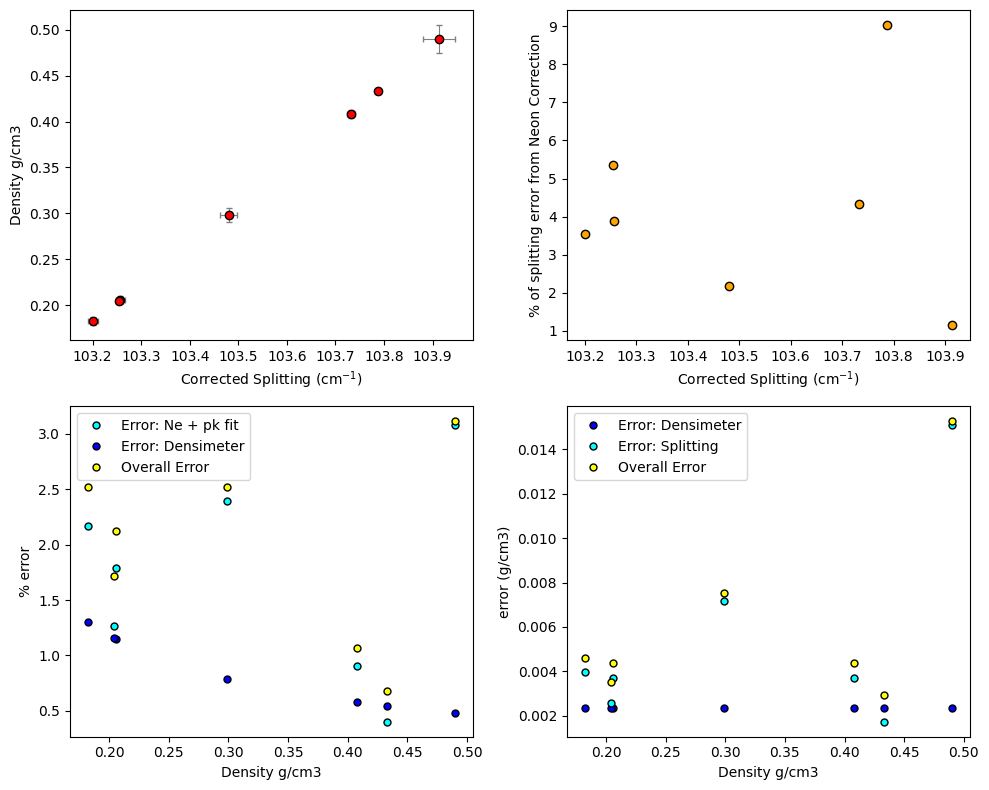

In [36]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

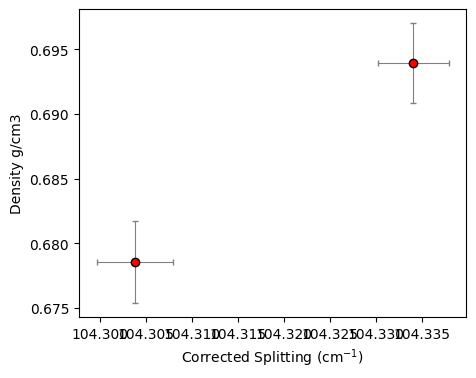

In [37]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [38]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

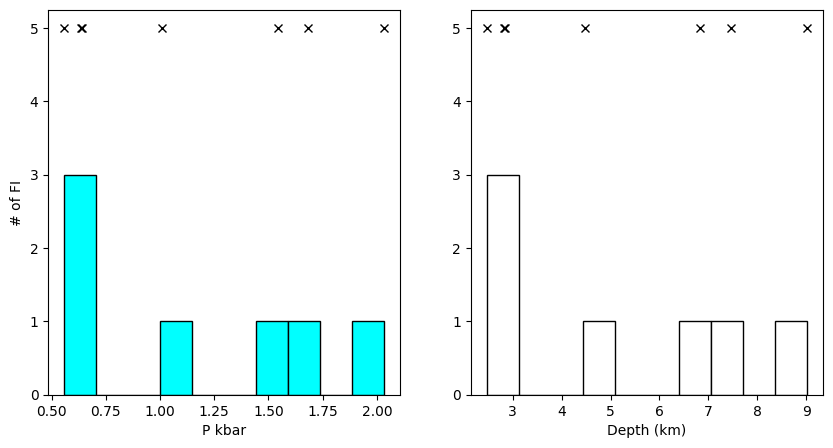

In [39]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [40]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step4 Stitch outputs is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()